In [ ]:
import cv2

In [ ]:
cv2.__version__

### SURF算法

In [ ]:
import cv2
import numpy as np

img = cv2.imread('./chess.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 创建SURF对象
surf = cv2.SURF_create()

# 返回的是列表, 里面每一个都是一个keypoint对象
kp = surf.detect(gray)
# 检测关键点, 并计算描述子(描述符)
kp, des = surf.detectAndCompute(img, None)
# print(type(kp))
# print(type(kp[0]))
# print(kp[0].pt)
#print(type(des))
# SURF算法的特征描述子是一个64维的向量, 比SIFT少了一半
#print(des.shape)

# surf.computer(img, kp)

# 绘制关键点
cv2.drawKeypoints(gray, kp, img)

cv2.imshow('SURF', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### ORB算法

In [ ]:
import cv2
import numpy as np

img = cv2.imread('chess.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 创建ORB对象
orb = cv2.ORB_create()

# 进行检测
kp = orb.detect(gray)

# 检测关键点, 并计算描述子
kp, des = orb.compute(img, kp)
# 或者一步到位, 把关键点和描述子一起检测出来.
kp, des = orb.detectAndCompute(img, None)
# print(kp)
print(des)
print(des.shape)


# 绘制关键点
cv2.drawKeypoints(gray, kp, img)

cv2.imshow('ORB', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[226 213 100 ... 220 213  95]
 [ 60  28 122 ...   3 100 179]
 [ 28 141  41 ... 137 176 160]
 ...
 [  3  89  23 ...  28 193 253]
 [167 241 117 ... 186 129 245]
 [131 216   3 ...   7  41 157]]
(500, 32)


### 暴力特征匹配

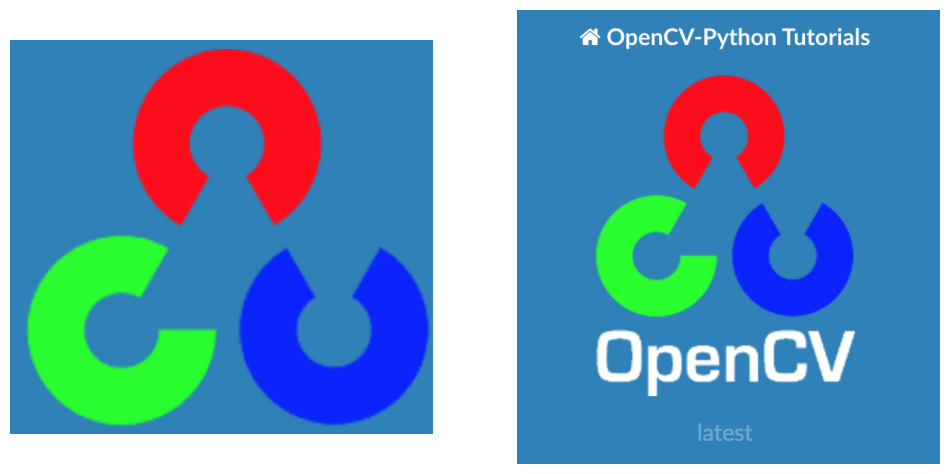

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
img1 = cv2.imread('./opencv_search.png')
img2 = cv2.imread('opencv_orig.png')
plt.figure(figsize=[12,6]);
plt.subplot(121); plt.imshow(img1[:,:,::-1]);plt.axis('off');plt.title("SIFT");
plt.subplot(122); plt.imshow(img2[:,:,::-1]);plt.axis('off');plt.title("SIFT");

In [ ]:
bf.match??

In [9]:
import cv2
import numpy as np

img1 = cv2.imread('./opencv_search.png')
img2 = cv2.imread('opencv_orig.png')

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# 创建特征检测对象
sift = cv2.SIFT_create()

# 计算描述子
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# 进行暴力匹配
bf = cv2.BFMatcher(cv2.NORM_L1)
# 进行匹配
match = bf.match(des1, des2)
# 除了match可以进行匹配, 还有knnMatch
# 一般k=2
match = bf.knnMatch(des1, des2, k=2)
# print(type(match))
# print(len(match))
# print(match)
# print(match[0][0].distance)
# print(match[0][0].queryIdx)
# print(match[0][0].trainIdx)

# 绘制特征匹配
# result = cv2.drawMatches(img1, kp1, img2, kp2, match, None)
# 专门用来画knnmatch匹配结果的
good = []
for m, n in match:
    # 设定阈值, 距离小于对方距离的0.7倍, 我们认为是好的匹配点. 
    if m.distance < 0.7 * n.distance:
        good.append(m)
        
result = cv2.drawMatchesKnn(img1, kp1, img2, kp2, [good], None)
cv2.imshow('result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

18
((< cv2.DMatch 000002BF39B601B0>, < cv2.DMatch 000002BF39B602F0>), (< cv2.DMatch 000002BF39B627D0>, < cv2.DMatch 000002BF39B60210>), (< cv2.DMatch 000002BF39B60170>, < cv2.DMatch 000002BF39B609D0>), (< cv2.DMatch 000002BF39B60230>, < cv2.DMatch 000002BF39B61110>), (< cv2.DMatch 000002BF39B61070>, < cv2.DMatch 000002BF39B60AD0>), (< cv2.DMatch 000002BF39B601D0>, < cv2.DMatch 000002BF39B60570>), (< cv2.DMatch 000002BF39B61050>, < cv2.DMatch 000002BF39B622B0>), (< cv2.DMatch 000002BF39B62250>, < cv2.DMatch 000002BF39B61D90>), (< cv2.DMatch 000002BF39B61D70>, < cv2.DMatch 000002BF39B61A50>), (< cv2.DMatch 000002BF39B619F0>, < cv2.DMatch 000002BF39B61990>), (< cv2.DMatch 000002BF39B61810>, < cv2.DMatch 000002BF39B617B0>), (< cv2.DMatch 000002BF39B61610>, < cv2.DMatch 000002BF39B615B0>), (< cv2.DMatch 000002BF39B61430>, < cv2.DMatch 000002BF39B613D0>), (< cv2.DMatch 000002BF39B60A50>, < cv2.DMatch 000002BF39B609F0>), (< cv2.DMatch 000002BF39B60530>, < cv2.DMatch 000002BF39B60510>), (< cv2

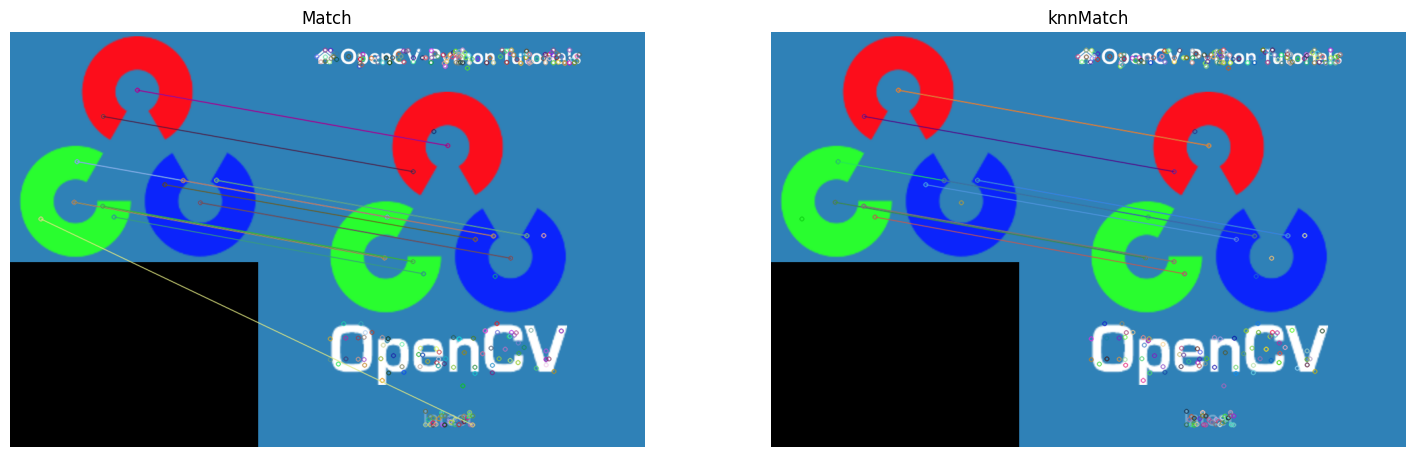

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


img1 = cv2.imread('./opencv_search.png')
img2 = cv2.imread('opencv_orig.png')

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# 创建特征检测对象
sift = cv2.SIFT_create()

# 计算描述子
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# 进行暴力匹配
bf = cv2.BFMatcher(cv2.NORM_L1)
# 进行匹配
match1 = bf.match(des1, des2)
result1 = cv2.drawMatches(img1, kp1, img2, kp2, match1, None)

# KNN匹配
match2 = bf.knnMatch(des1, des2, k=2)
# 比率测试
good_matches = []
for m, n in match2:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)
        
# 绘制匹配特征
result2 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, [good_matches], None)


plt.figure(figsize=[18,8]);
plt.subplot(121); plt.imshow(result1[:,:,::-1]);plt.axis('off');plt.title("Match");
plt.subplot(122); plt.imshow(result2[:,:,::-1]);plt.axis('off');plt.title("knnMatch");

### FLANN特征匹配

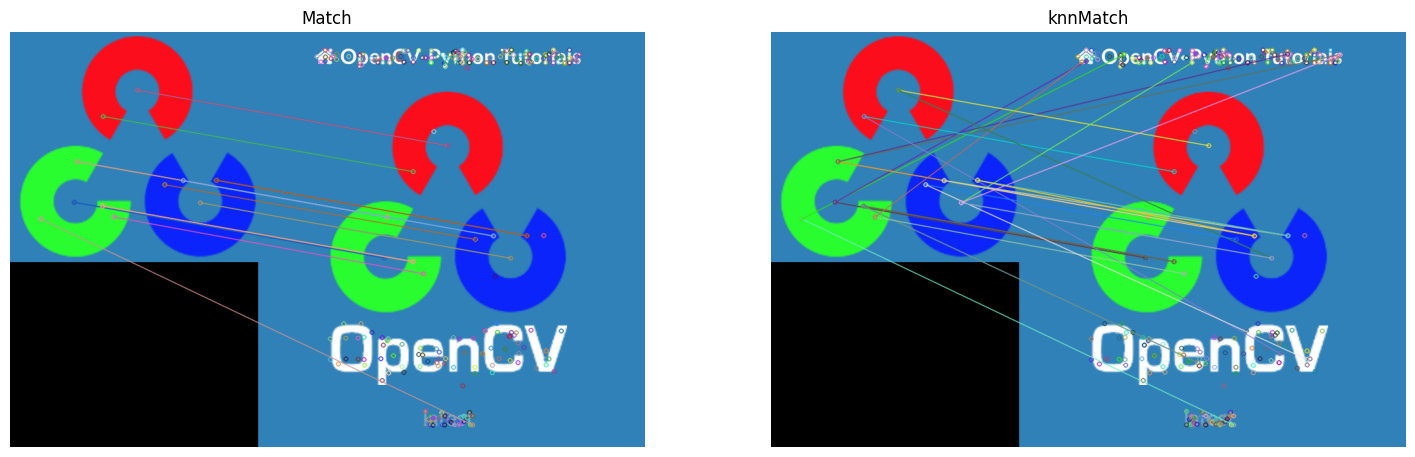

In [4]:
plt.figure(figsize=[18,8]);
plt.subplot(121); plt.imshow(result1[:,:,::-1]);plt.axis('off');plt.title("Match");
plt.subplot(122); plt.imshow(result2[:,:,::-1]);plt.axis('off');plt.title("knnMatch");

In [7]:
import cv2
import numpy as np

img1 = cv2.imread('./opencv_search.png')
img2 = cv2.imread('opencv_orig.png')

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# 创建特征检测对象
sift = cv2.SIFT_create()

# 计算描述子
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# 创建FLANN特征匹配对象
index_params = dict(algorithm=1, tree=5)
# 根据经验, kdtree设置5个tree, 那么checks一般设置为50
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.match(des1, des2)

print(len(matches))

result = cv2.drawMatches(img1, kp1, img2, kp2, matches, None)

cv2.imshow('result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

18
